# Library Declaration

In [2]:
import os
import numpy as np
import keras
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import LeakyReLU
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils 
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import regularizers
import sklearn.metrics as metrics
from keras.applications import VGG19
from keras.callbacks import ReduceLROnPlateau


Using TensorFlow backend.


# Download Dataset From Keras Library

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_test)

[[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

# Upload Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
data_batch_1 = unpickle('/content/drive/My Drive/Dataset/data_batch_1')
data_batch_2 = unpickle('/content/drive/My Drive/Dataset/data_batch_2')
data_batch_3  = unpickle('/content/drive/My Drive/Dataset/data_batch_3')
data_batch_4 = unpickle('/content/drive/My Drive/Dataset/data_batch_4')
data_batch_5 = unpickle('/content/drive/My Drive/Dataset/data_batch_5')
test_batch = unpickle('/content/drive/My Drive/Dataset/test_batch')
print(test_batch.keys())
print(test_batch.values())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_values([b'testing batch 1 of 1', [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6,

In [ ]:
# merge train datasets into single dataset
db1 = np.reshape(np.array(data_batch_1.get(b'data'), dtype='uint8'),(10000,3,32,32))
db2 = np.reshape(np.array(data_batch_2.get(b'data'), dtype='uint8'),(10000,3,32,32))
db3 = np.reshape(np.array(data_batch_3.get(b'data'), dtype='uint8'),(10000,3,32,32))
db4 = np.reshape(np.array(data_batch_4.get(b'data'), dtype = 'uint8'),(10000,3,32,32))
db5 = np.reshape(np.array(data_batch_5.get(b'data'), dtype= 'uint8'),(10000,3,32,32))
x_test = np.reshape(np.array(test_batch.get(b'data'), dtype='uint8'), (10000,3,32,32))
x_train = np.append(db1,db2)
db_1 = np.append(db4,db5)
x_train = np.append(x_train,db3)
x_train = np.append(x_train,db_1)
print(x_test)

[[[[158 159 165 ... 137 126 116]
   [152 151 159 ... 136 125 119]
   [151 151 158 ... 139 130 120]
   ...
   [ 68  42  31 ...  38  13  40]
   [ 61  49  35 ...  26  29  20]
   [ 54  56  45 ...  24  34  21]]

  [[112 111 116 ...  95  91  85]
   [112 110 114 ...  95  91  88]
   [110 109 111 ...  98  95  89]
   ...
   [124 100  88 ...  97  64  85]
   [116 102  85 ...  82  82  64]
   [107 105  89 ...  77  84  67]]

  [[ 49  47  51 ...  36  36  33]
   [ 51  40  45 ...  31  32  34]
   [ 47  33  36 ...  34  34  33]
   ...
   [177 148 137 ... 146 108 127]
   [168 148 132 ... 130 126 107]
   [160 149 132 ... 124 129 110]]]


 [[[235 231 232 ... 233 233 232]
   [238 235 235 ... 236 236 235]
   [237 234 234 ... 235 235 234]
   ...
   [ 87  43  19 ... 169 182 188]
   [ 82  46  36 ... 174 185 187]
   [ 85  62  58 ... 168 180 186]]

  [[235 231 232 ... 233 233 232]
   [238 235 235 ... 236 236 235]
   [237 234 234 ... 235 235 234]
   ...
   [ 99  51  23 ... 184 197 202]
   [ 96  57  44 ... 189 200 202

In [ ]:
x_train = np.reshape(x_train,(50000,3,32,32))
x_train[0][0]

array([[ 59,  43,  50, ..., 158, 152, 148],
       [ 16,   0,  18, ..., 123, 119, 122],
       [ 25,  16,  49, ..., 118, 120, 109],
       ...,
       [208, 201, 198, ..., 160,  56,  53],
       [180, 173, 186, ..., 184,  97,  83],
       [177, 168, 179, ..., 216, 151, 123]], dtype=uint8)

In [ ]:
x_train=x_train.transpose(0,2,3,1)
x_train[0][0]
x_test = x_test.transpose(0,2,3,1)
x_test[0][0]

array([[158, 112,  49],
       [159, 111,  47],
       [165, 116,  51],
       [166, 118,  53],
       [160, 112,  46],
       [156, 109,  41],
       [162, 115,  47],
       [159, 113,  45],
       [158, 111,  44],
       [159, 113,  41],
       [161, 116,  41],
       [160, 111,  52],
       [161, 111,  49],
       [166, 117,  41],
       [169, 117,  45],
       [170, 119,  44],
       [167, 117,  40],
       [162, 113,  38],
       [160, 111,  39],
       [160, 112,  43],
       [156, 109,  44],
       [149, 107,  45],
       [150, 107,  45],
       [148, 106,  43],
       [149, 107,  44],
       [143, 101,  39],
       [140,  98,  43],
       [141,  97,  41],
       [143,  97,  38],
       [137,  95,  36],
       [126,  91,  36],
       [116,  85,  33]], dtype=uint8)

In [ ]:
#merge labels of train datasets 
y_train = np.array(data_batch_1.get(b'labels'))
y_train = np.append(y_train, np.array(data_batch_2.get(b'labels')))
y_train = np.append(y_train, np.array(data_batch_3.get(b'labels')))
y_train = np.append(y_train, np.array(data_batch_2.get(b'labels')))
y_train = np.append(y_train, np.array(data_batch_2.get(b'labels')))
print(y_train.shape)
y_test = np.array(test_batch.get(b'labels'))
print(y_test.shape)

(50000,)
(10000,)


In [ ]:
print(len(X_train), len(Y_train))
print(len(np.unique(Y_train)))
print(len(X_test), len((Y_test)))

50000 50000
10
10000 10000


# Images in Dataset

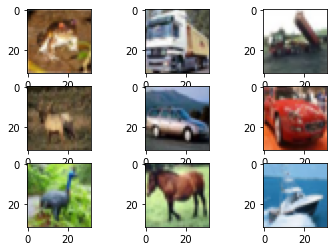

In [ ]:
for i in range(0,9):
	pyplot.subplot(3,3,1+i)
	pyplot.imshow(X_train[i])
pyplot.show()


# Normalization

In [4]:
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
y_train=np_utils.to_categorical(Y_train,10)
y_test=np_utils.to_categorical(Y_test,10)

# Data Augumentation

In [6]:
data_generator = ImageDataGenerator(rotation_range=0.2, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, 100)

#Creating Model

In [ ]:
vgg_model = VGG19(
    weights='imagenet', 
    include_top=False, 
    classes=10,
    input_shape=(32,32,3)
)
vgg_model.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [7]:
lrr= ReduceLROnPlateau(
                       monitor='val_acc', #Metric to be measured
                       factor=.01, #Factor by which learning rate will be reduced
                       patience=3,  #No. of epochs after which if there is no improvement in the val_acc, the learning rate is reduced
                       min_lr=1e-5)

In [8]:
model = Sequential()
model.add(VGG19(
    weights='imagenet', 
    include_top=False, 
    classes=10,
    input_shape=(32,32,3)
))
model.add(Flatten())
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu')))
model.add(Dropout(0.3))
model.add(Dense(256,activation=('relu'))) 
model.add(Dense(128,activation=('relu')))
model.add(Dropout(0.5))
model.add(Dense(10,activation=('softmax')))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
history = model.fit(train_generator, epochs=10,validation_data=(x_test, y_test), callbacks=[lrr], verbose=1)

Epoch 1/10
500/500 [==============================] - 7005s 14s/step - loss: 2.0048 - accuracy: 0.1825 - val_loss: 1.8170 - val_accuracy: 0.2305
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


150/500 [========>.....................] - ETA: 1:14:02 - loss: 1.8345 - accuracy: 0.2368

In [ ]:
model.save('cnn_vgg19.h5')

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)       

# Training Model

In [ ]:
history = model.fit(train_generator, epochs=40,validation_data=(x_test, y_test))

Epoch 1/40
50/50 [==============================] - 765s 15s/step - loss: 0.4678 - accuracy: 0.8407 - val_loss: 0.4824 - val_accuracy: 0.8399
Epoch 2/40
50/50 [==============================] - 758s 15s/step - loss: 0.4265 - accuracy: 0.8523 - val_loss: 0.4661 - val_accuracy: 0.8480
Epoch 3/40
50/50 [==============================] - 760s 15s/step - loss: 0.4092 - accuracy: 0.8601 - val_loss: 0.4531 - val_accuracy: 0.8512
Epoch 4/40
50/50 [==============================] - 761s 15s/step - loss: 0.3950 - accuracy: 0.8640 - val_loss: 0.4567 - val_accuracy: 0.8520
Epoch 5/40
50/50 [==============================] - 762s 15s/step - loss: 0.3878 - accuracy: 0.8654 - val_loss: 0.4406 - val_accuracy: 0.8561
Epoch 6/40
50/50 [==============================] - 750s 15s/step - loss: 0.3809 - accuracy: 0.8673 - val_loss: 0.4515 - val_accuracy: 0.8516
Epoch 7/40
50/50 [==============================] - 751s 15s/step - loss: 0.3713 - accuracy: 0.8719 - val_loss: 0.4312 - val_accuracy: 0.8582
Epoch 

# Accuracy of Model

In [ ]:
test_loss,test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 25s 3ms/step
Test loss: 0.41641932892799377
Test accuracy: 0.8658000230789185


# Save Model

In [ ]:
model.save('model_86.h5')

**Training Result Visualization**

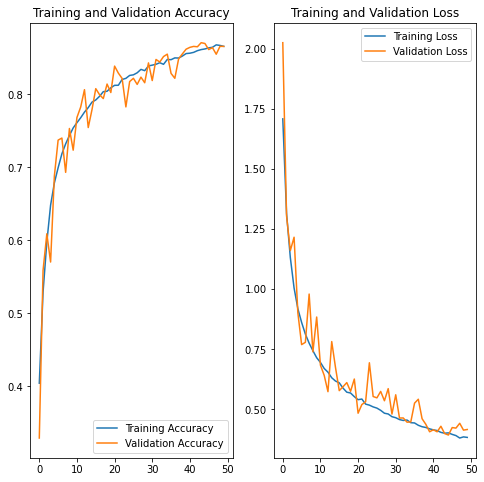

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs=50
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Load Model

In [ ]:
model = load_model('/content/model_86.h5')

# Predicting Images

In [ ]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

In [ ]:
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)

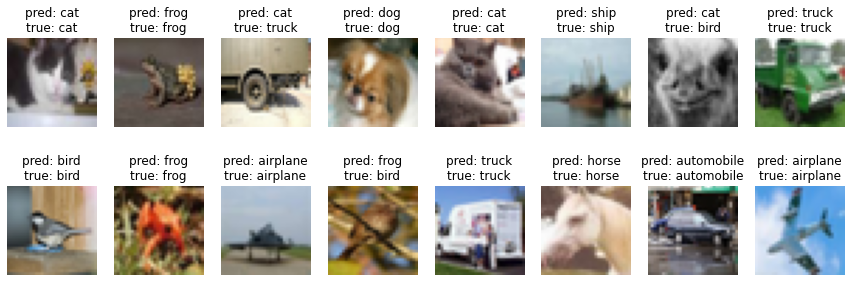

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(Y_test))
        #print(random_index)
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label =  cifar10_classes[pred_classes[random_index]]
        #print(y_test[random_index,0])
        true_label = cifar10_classes[Y_test[random_index, 0]]
        ax.set_title("pred: {}\ntrue: {}".format(
               pred_label,  true_label
        ))
plt.show()

# Confusion Matrix

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
confusion_matrix

array([[860,  13,  31,  11,  16,   1,  11,   3,  32,  22],
       [  3, 974,   0,   0,   1,   0,   3,   0,   1,  18],
       [ 24,   3, 779,  24,  56,  27,  71,  11,   2,   3],
       [  9,   5,  31, 696,  35,  91, 115,   9,   3,   6],
       [  0,   1,  17,  20, 900,  12,  44,   6,   0,   0],
       [  2,   2,  18, 101,  32, 777,  53,  11,   0,   4],
       [  1,   2,  12,  14,   4,   0, 963,   0,   2,   2],
       [ 11,   0,  14,  17,  48,  24,  24, 857,   0,   5],
       [ 21,  12,   6,   2,   2,   2,  10,   1, 917,  27],
       [  5,  44,   2,   3,   1,   0,   3,   2,   5, 935]])